In [1]:
# import packages 导入库，搭建环境
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# plotly库，用于3D空间绘图
import plotly.express as px

# 类别变量编码器
import category_encoders as ce

# K均值和K近邻算法
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# 主成分分析
from sklearn.decomposition import PCA

# 标准化预处理
from sklearn.preprocessing import StandardScaler

# 设置随机种子固定输出结果
np.random.RandomState(42)

#设置Seaborn绘图主题
sns.set_theme()

# 英特尔加速扩展，需去掉
from sklearnex import patch_sklearn
patch_sklearn()

# ignore warnings 可以删除
import warnings
warnings.filterwarnings('ignore')

# 为了让matplotlib里显示中文字符
import matplotlib.font_manager as fm 
matplotlib.rcParams['font.family'] = 'Microsoft Yahei' # 设置字体
# matplotlib.rcParams['font.family'] = 'Heiti TC'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# data import 数据导入
df = pd.read_csv('老客户信息.csv')

In [3]:
# 初步预览数据，由于变量过多将表格转置后查看
df.head().T

,0,1,2,3,4
客户ID,15889,15890,15892,15893,15894
雇员关系,员工家属,在职员工,员工家属,非员工,在职员工
性别,男,男,女,男,男
年龄层级,45-60岁,60-75岁,60-75岁,60-75岁,45-60岁
开户时长,245,246,246,246,246
客户状态,活跃客户,活跃客户,活跃客户,活跃客户,活跃客户
是否外国人,否,否,否,否,否
开户渠道,KAT,KAT,KAT,KAT,KAT
省份名称,北京,北京,北京,北京,北京
年收入,326124.9,71461.2,430477.41,430477.41,281757.72


我们可以发现数据包含两个部分：前半部分是客户个人信息，后半部分是客户购买行为

In [4]:
# 检查变量类型以及缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80237 entries, 0 to 80236
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客户ID    80237 non-null  int64  
 1   雇员关系    80237 non-null  object 
 2   性别      80237 non-null  object 
 3   年龄层级    80237 non-null  object 
 4   开户时长    80237 non-null  int64  
 5   客户状态    80237 non-null  object 
 6   是否外国人   80237 non-null  object 
 7   开户渠道    80237 non-null  object 
 8   省份名称    80237 non-null  object 
 9   年收入     80237 non-null  float64
 10  客户等级    80237 non-null  object 
 11  金融衍生品   80237 non-null  int64  
 12  工资账户    80237 non-null  int64  
 13  高级个人账户  80237 non-null  int64  
 14  个人账户    80237 non-null  int64  
 15  尊享个人账户  80237 non-null  int64  
 16  短期存款    80237 non-null  int64  
 17  中期存款    80237 non-null  int64  
 18  长期存款    80237 non-null  int64  
 19  基金      80237 non-null  int64  
 20  抵押贷款    80237 non-null  int64  
 21  养老金     80237 non-null  int64  
 22

类别变量：雇员关系、性别、客户关系、是否外国人、开户渠道、省份名称、客户等级</br>
类别变量需在后续建模中通过序号编码转换为连续变量</br>
数据无缺失值

In [5]:
# 检查连续变量的分布
df.describe()

,客户ID,开户时长,年收入,金融衍生品,工资账户,高级个人账户,个人账户,尊享个人账户,短期存款,中期存款,长期存款,基金,抵押贷款,养老金,小额贷款,信用卡,证券
count,8.023700e+04,80237.000000,8.023700e+04,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000,80237.000000
mean,5.899902e+05,115.233770,1.470183e+05,0.001558,0.364483,0.059611,0.389147,0.123758,0.036779,0.005820,0.180328,0.070616,0.019729,0.037277,0.004898,0.240051,0.099069
std,4.611213e+05,76.458759,1.233927e+05,0.039440,0.481288,0.236766,0.487560,0.329308,0.188219,0.076069,0.384463,0.256184,0.139069,0.189441,0.069814,0.427117,0.298757
min,1.588900e+04,0.000000,5.651550e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.062550e+05,28.000000,8.225220e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.576100e+05,134.000000,1.213359e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.071523e+06,173.000000,1.792235e+05,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.454612e+06,246.000000,1.113990e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


观察到年收入一栏有显著离群值，故进行log变换；开户时长的单位是月，转换为年

In [6]:
df['年收入log'] = np.log(df['年收入'])
df['开户时长'] = np.floor(df['开户时长'] / 12)

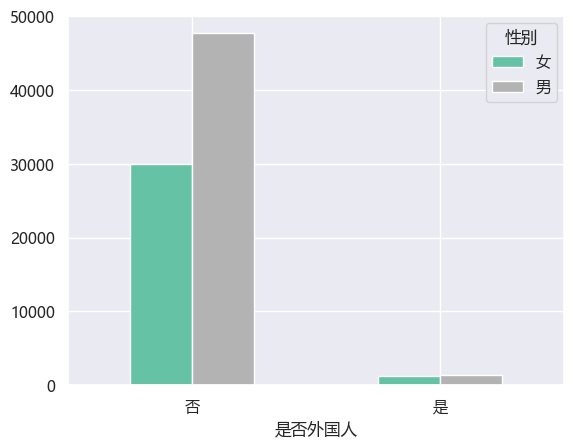

In [7]:
df[['客户ID','性别', '是否外国人']]\
    .groupby(['性别', '是否外国人']).count().reset_index()\
    .pivot_table(values='客户ID', index='是否外国人', columns='性别')\
    .plot(kind='bar', colormap='Set2', )
plt.xticks(rotation=0);

整体上男性偏多，外国人占比非常小

In [8]:
df['雇员关系'].value_counts()

非员工     79973
离职员工      101
在职员工       82
员工家属       81
Name: 雇员关系, dtype: int64

与银行有关的群体基数过小

<Axes: xlabel='年龄层级', ylabel='Count'>

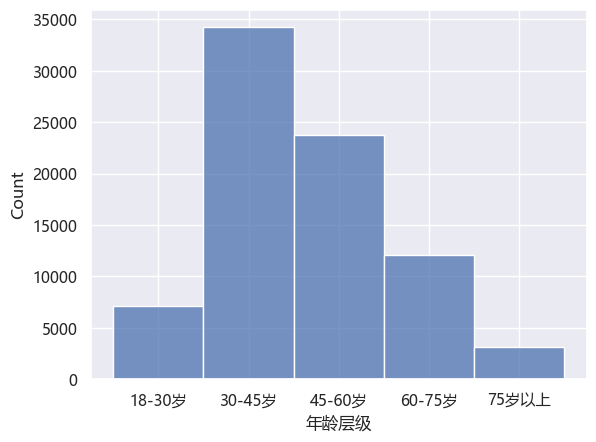

In [9]:
df['年龄层级'] = pd.Categorical(df['年龄层级'], categories=['18-30岁', '30-45岁', '45-60岁', '60-75岁', '75岁以上'])
sns.histplot(df['年龄层级'], binwidth=1, palette="Set2")

年龄分布符合右偏分布，以30-45岁年龄段居多

<Axes: xlabel='开户时长', ylabel='Count'>

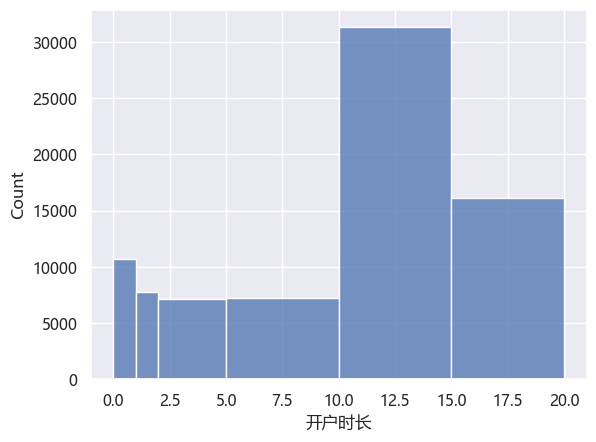

In [10]:
sns.histplot(df['开户时长'], palette="Set2", bins=[0, 1, 2, 5, 10, 15, 20])
# bins使直方图中的箱按照人工定义进行计数

手动设置直方图中每个箱的边界，从而实现对开户时长进行分段化处理。通过设置不同的边界值实现不同的业务目的。</br>上图分段为：0-1年、1-2年、2-5年，5-10年、10-15年、15-20年。

<Axes: xlabel='开户时长', ylabel='客户等级'>

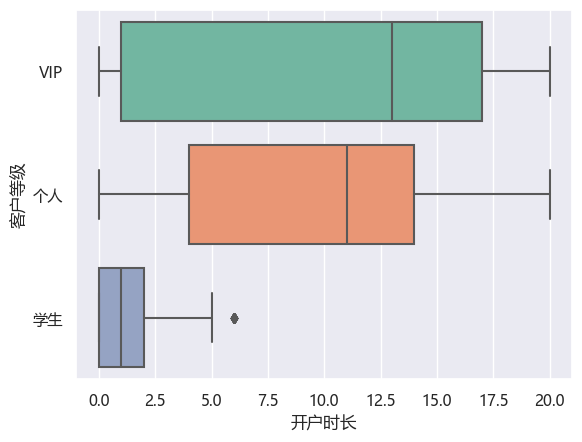

In [11]:
sns.boxplot(data=df, x='开户时长', y='客户等级', palette="Set2")

学生账户开户时长显著短于其他级别客户，符合其定位。个人客户开户时长在整个时间维度上分布均匀。VIP客户开户时长中位数较个人客户略高一些，整体分布宽度更宽，可能为通过营销、邀请、奖励等手段获取到的其他银行的高级客户。

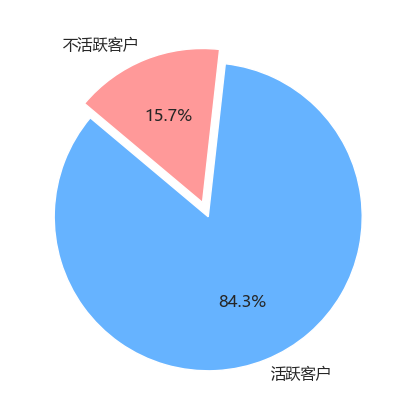

In [12]:
type_counts = df['客户状态'].value_counts()
labels = ['活跃客户', '不活跃客户']
colors = ['#66b3ff','#ff9999']
explode = (0.1, 0)  
plt.figure(figsize=(7,5))
plt.pie(type_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.show()

不活跃客户占比较少

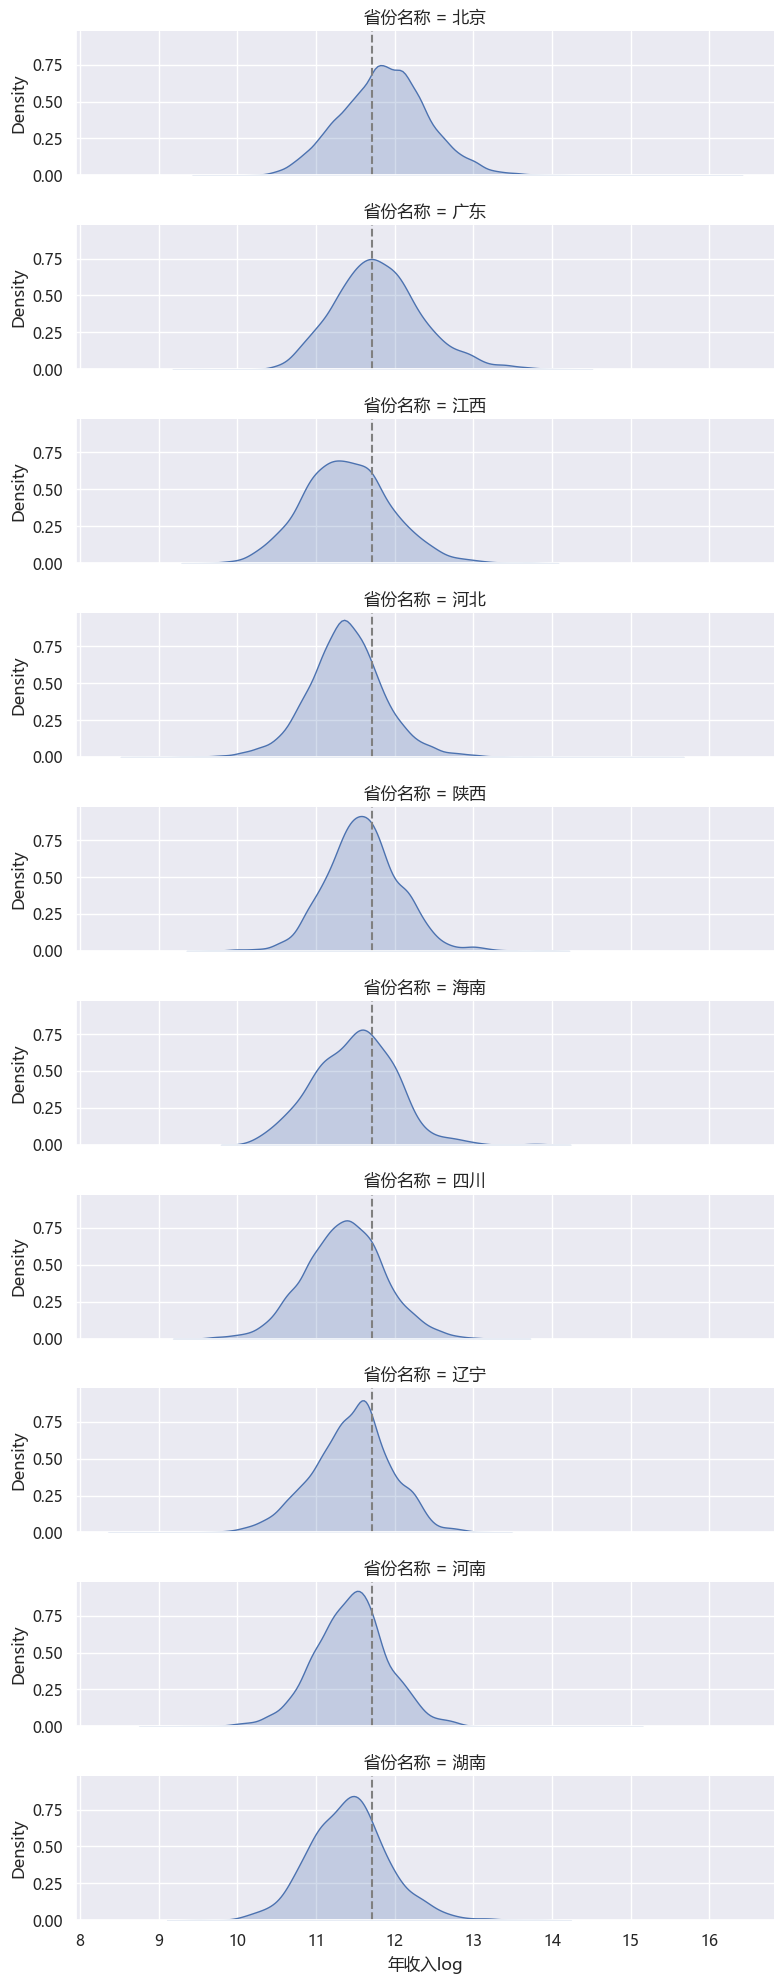

In [13]:
# FacetGrid能实现以某一变量为基准横向对比不同数值下目标变量的分布
s = sns.FacetGrid(df, row='省份名称', aspect=4, height=2)

# 使用map_dataframe在FacetGrid中绘图，第一项输入为绘制的图表函数，之后为该图表函数的输入值
s.map_dataframe(sns.kdeplot, x='年收入log', fill=True)

# refline加入参考值，此处在x轴上加入整体的平均数
s.refline(x=df['年收入log'].mean())

# tight_layout使得FacetGrid紧凑化
s.tight_layout()

观察工资分布随不同省份的变化，其中图中的虚线为整体工资的平均数。观察发现不同省份的工资分布都为正态分布，但其平均数有较大差异。

In [14]:
print(df['开户渠道'].value_counts())
print(len(df['开户渠道'].unique()))
df.drop(columns='开户渠道', inplace=True)

KAT    33656
KFC    22084
KFA     4769
KHE     2954
KHK     2846
       ...  
KFV        1
KFL        1
KDG        1
KAV        1
KEC        1
Name: 开户渠道, Length: 127, dtype: int64
127


开户渠道数量过多，且存在不同渠道客户数量不平衡的情况。由于后期聚类操作时我们需要将类编变量进行序号编码，该特性会导致编码后的数据范围过大，且分布极其不平均，会对聚类结果造成极大影响，故删除。

<Axes: xlabel='计数', ylabel='产品'>

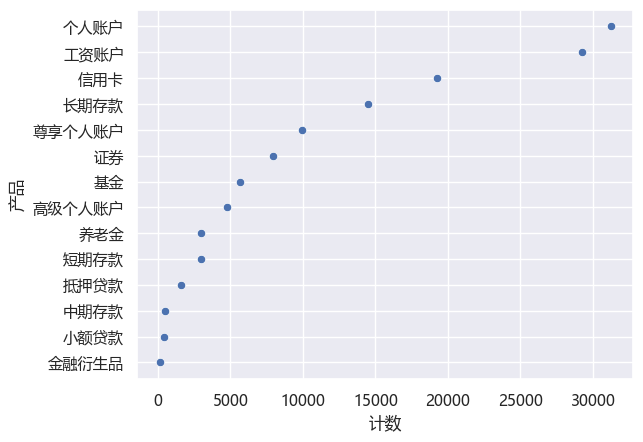

In [15]:
# 将客户购买行为单独提出。由于购买行为为独热编码，故通过求和即可进行计数
product = df[['金融衍生品',
              '工资账户',
              '高级个人账户',
              '个人账户',
              '尊享个人账户',
              '短期存款',
              '中期存款',
              '长期存款',
              '基金',
              '抵押贷款',
              '养老金',
              '小额贷款',
              '信用卡',
              '证券']].sum().reset_index(name='计数')

# 根据计数结果从大到小绘制散点图。该图名称为克利夫兰点图
product.sort_values(by='计数', ascending=False, inplace=True)
product.rename(columns={'index': '产品'}, inplace=True)
sns.scatterplot(data=product, y='产品', x='计数')

观察到个人账户和工资账户数量显著多余其他产品，可能为开户必要产品，故我们在后期产品推荐时不考虑这两类

In [16]:
# 分别选取开通了个人账户、工资账户、信用卡的客户进行分析
personal = df[df['个人账户'] == 1]
payroll = df[df['工资账户'] == 1]
credit = df[df['信用卡'] == 1]

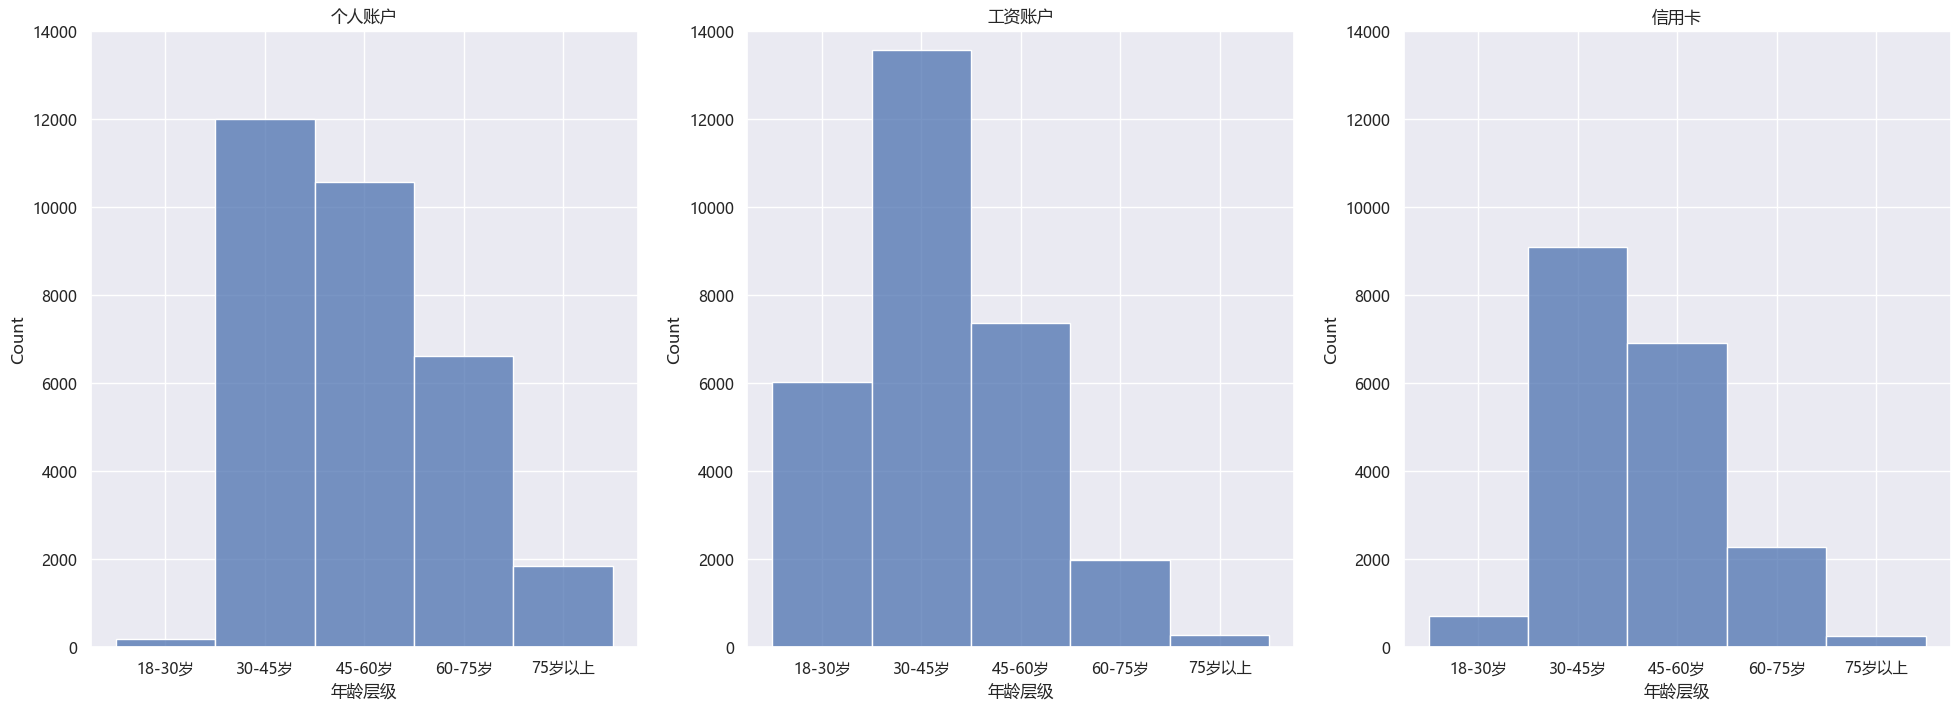

In [17]:
# 使用subplots横向对比三个产品间的分布情况
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
# 固定每个子图的坐标轴便于横向对比
for ax in axes:
    ax.set_ylim([0, 14000])
plt.subplot(1, 3, 1)
sns.histplot(personal['年龄层级'], binwidth=1, palette="Set2")
plt.title('个人账户');
plt.subplot(1, 3, 2)
sns.histplot(payroll['年龄层级'], binwidth=1, palette="Set2")
plt.title('工资账户');
plt.subplot(1, 3, 3)
sns.histplot(credit['年龄层级'], binwidth=1, palette="Set2")
plt.title('信用卡');

观察到个人账户和工资账户年龄分布和整体年龄分布有较大出入，其中18-30岁群体开通个人账户的数量显著低于工资账户和信用卡。

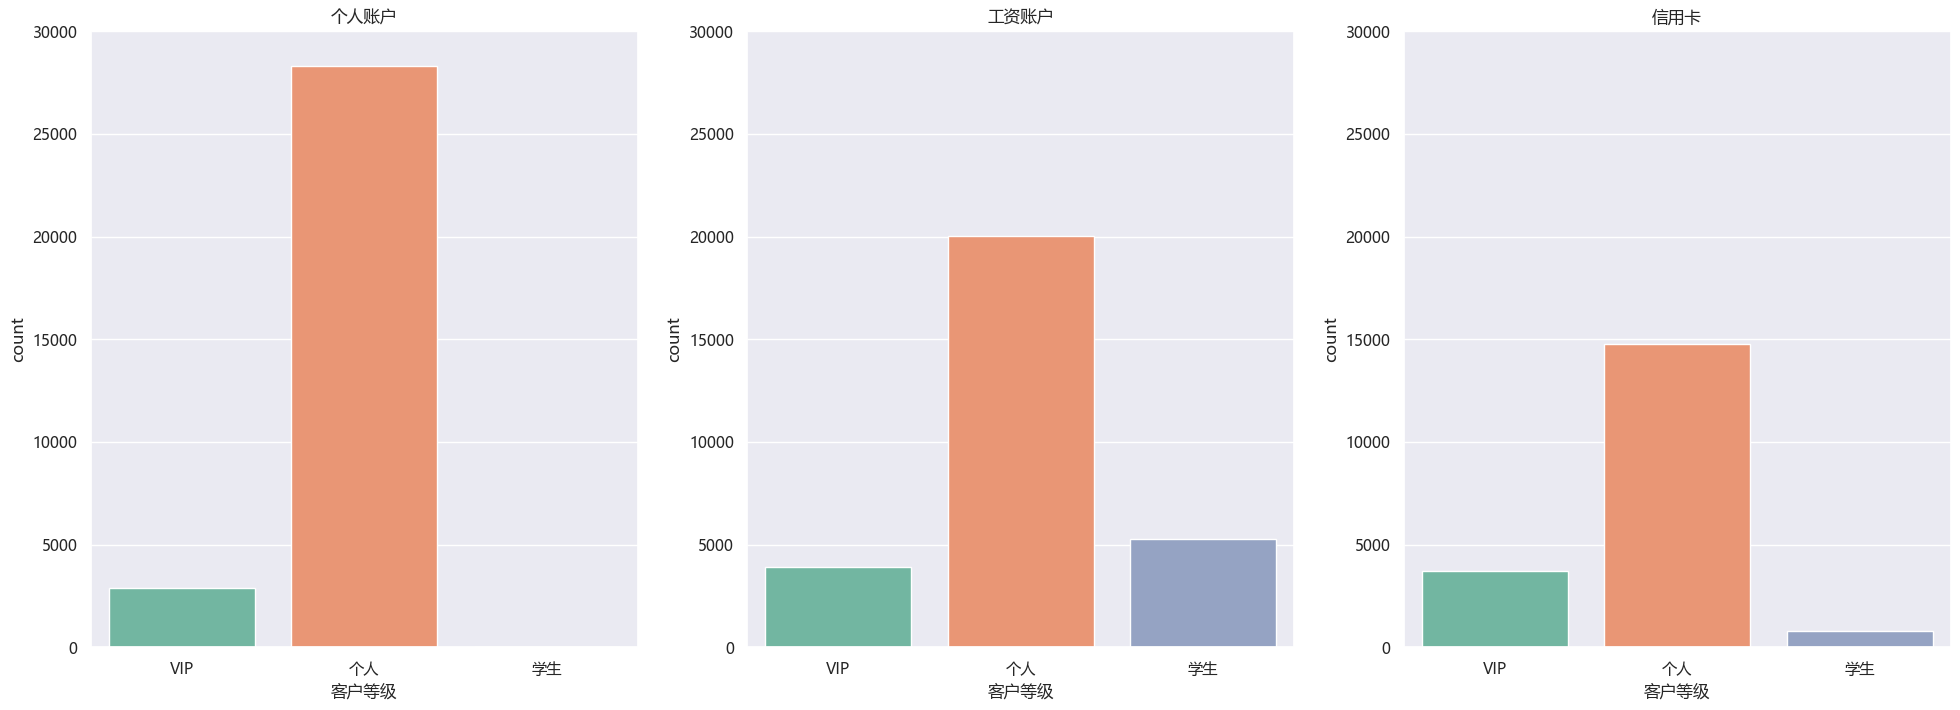

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for ax in axes:
    ax.set_ylim([0, 30000])
plt.subplot(1, 3, 1)
sns.countplot(data=personal, x='客户等级', order=['VIP', '个人', '学生'], palette="Set2")
plt.title('个人账户');
plt.subplot(1, 3, 2)
sns.countplot(data=payroll, x='客户等级', order=['VIP', '个人', '学生'], palette="Set2")
plt.title('工资账户');
plt.subplot(1, 3, 3)
sns.countplot(data=credit, x='客户等级', order=['VIP', '个人', '学生'], palette="Set2")
plt.title('信用卡');

观察到学生客户中几乎没有人开通个人账户，符合前面对年龄分析的结果。VIP客户三种产品数量差别不大。

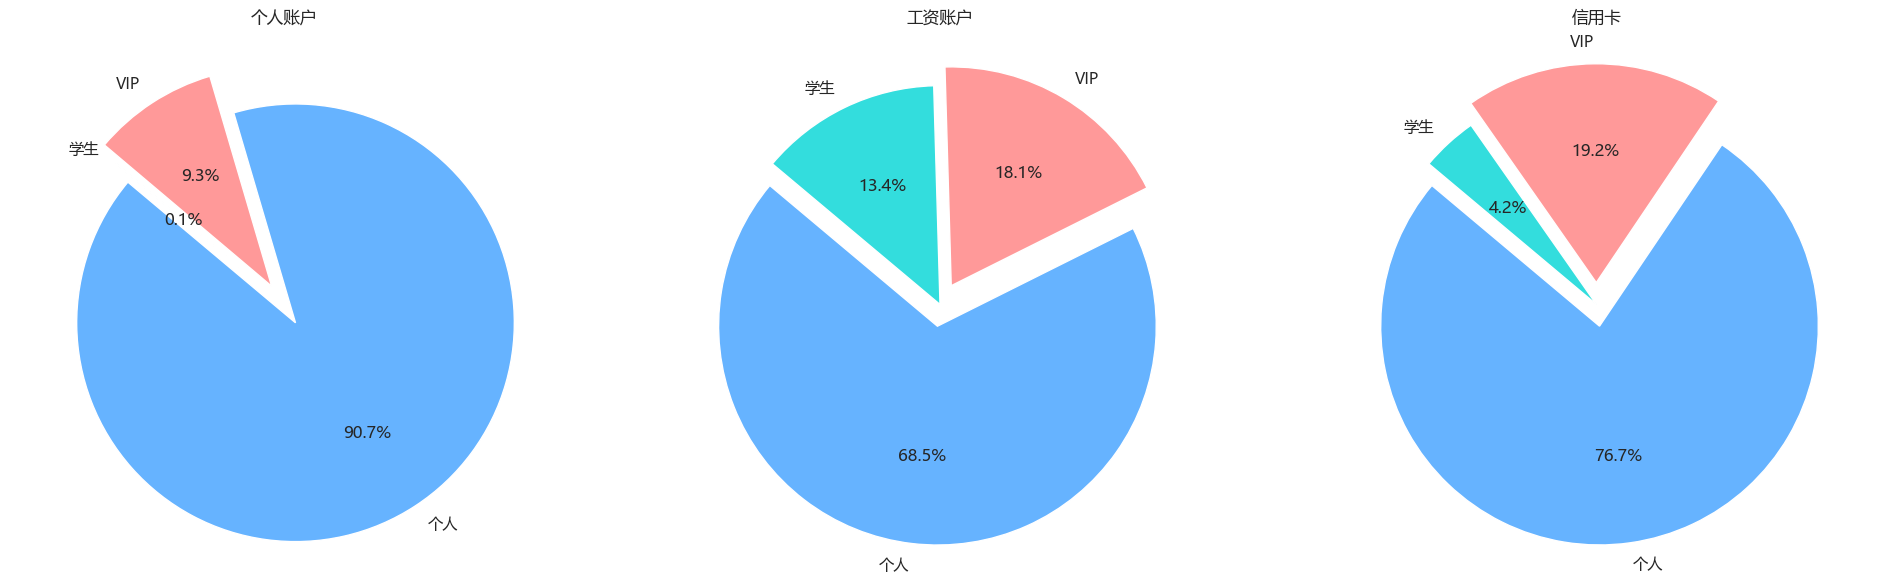

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
plt.subplot(1, 3, 1)
type_counts = personal['客户等级'].value_counts()
labels = ['个人', 'VIP', '学生']
colors = ['#66b3ff','#ff9999', '#33dddd']
explode = (0.1, 0.1, 0)
plt.pie(type_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('个人账户');
plt.subplot(1, 3, 2)
type_counts = payroll['客户等级'].value_counts()
labels = ['个人', 'VIP', '学生']
colors = ['#66b3ff','#ff9999', '#33dddd']
explode = (0.1, 0.1, 0)
plt.pie(type_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('工资账户');
plt.subplot(1, 3, 3)
type_counts = credit['客户等级'].value_counts()
labels = ['个人', 'VIP', '学生']
colors = ['#66b3ff','#ff9999', '#33dddd']
explode = (0.1, 0.1, 0)
plt.pie(type_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('信用卡');

通过饼图分析不同等级在不同产品上占比的区别

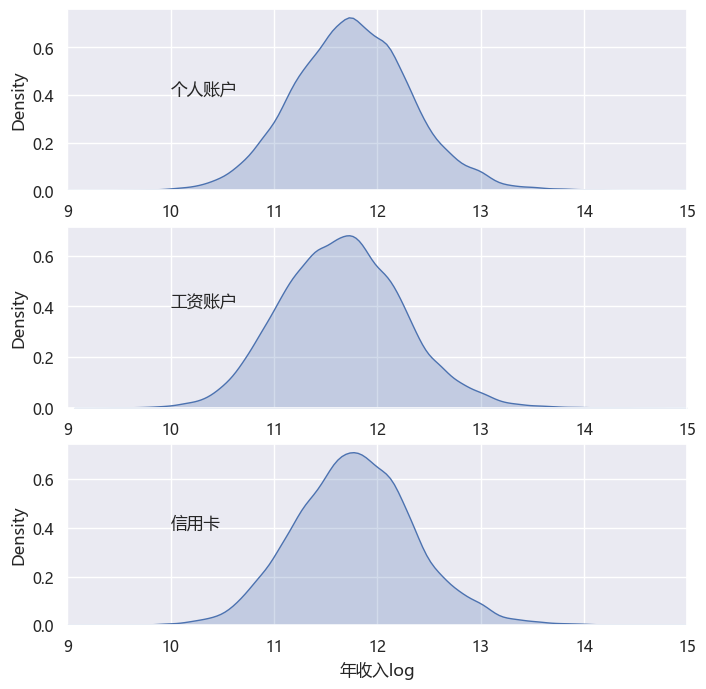

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
# 固定x轴范围便于对比
for ax in axes:
    ax.set_xlim([9, 15])
plt.subplot(3, 1, 1)
sns.kdeplot(data=personal, x='年收入log', fill=True)
# 由于纵向空间紧凑故在图中加入文本的方式添加标题
plt.text(x=10, y=0.4, s='个人账户');
plt.subplot(3, 1, 2)
sns.kdeplot(data=payroll, x='年收入log', fill=True)
plt.text(x=10, y=0.4, s='工资账户');
plt.subplot(3, 1, 3)
sns.kdeplot(data=credit, x='年收入log', fill=True)
plt.text(x=10, y=0.4, s='信用卡');

观察到不同产品间年收入区别不大

提取出客户个人信息，以供后续建模

In [21]:
cus = df[['雇员关系',
          '性别',
          '年龄层级',
          '开户时长',
          '客户状态',
          '是否外国人',
          '省份名称',
          '年收入log',
          '客户等级']]

In [22]:
# 使用OrdinalEncoder函数实现自动序号编码
encoder = ce.OrdinalEncoder(cols=['雇员关系',
                                  '性别',
                                  '年龄层级',
                                  '客户状态',
                                  '是否外国人',
                                  '省份名称',
                                  '客户等级'], return_df=True)
# col为需要编码的变量

将客户信息进行编码转换，该行为不会对连续变量进行转换

In [23]:
cus = encoder.fit_transform(cus)

使用K均值算法根据客户的个人信息进行聚类。K均值算法是非监督学习算法，其会根据数据间的距离关系自动生成聚类。在聚类完成后我们会根据每一类别中所有客户购买产品的数量进行个性化推荐。为方便演示我们只把客户分为5类。

In [24]:
n = 5
# 定义聚类器，n_clusters为类别数目
km = KMeans(n_clusters=n, random_state=42)
km.fit(cus)
# .labels_可以输出聚类后每个输入的对应类别
labels = km.labels_

展示聚类结果

In [25]:
df['聚类'] = labels
df.sample(5).T
# sample方法会随机抽取n个表格里的数据

,3313,25391,54857,10561,60925
客户ID,36609,250509,855062,83430,1095620
雇员关系,非员工,非员工,非员工,非员工,非员工
性别,男,女,男,男,男
年龄层级,60-75岁,30-45岁,18-30岁,45-60岁,18-30岁
开户时长,19.0,14.0,5.0,17.0,2.0
客户状态,活跃客户,活跃客户,活跃客户,活跃客户,活跃客户
是否外国人,否,否,否,否,否
省份名称,江西,北京,北京,北京,四川
年收入,76626.93,116864.61,74274.33,401659.71,178317.03
客户等级,VIP,个人,学生,个人,学生


使用聚合函数生成每一类别的产品购买总数

In [26]:
pref = df.groupby('聚类').agg({'金融衍生品': sum,
                               '高级个人账户': sum,
                               '尊享个人账户': sum,
                               '短期存款': sum,
                               '中期存款': sum,
                               '长期存款': sum,
                               '基金': sum,
                               '抵押贷款': sum,
                               '养老金': sum,
                               '小额贷款': sum,
                               '信用卡': sum,
                               '证券': sum})

将聚合后的产品购买信息进行排序，然后转换为列表方便后续推荐时读取

In [27]:
# 创建一个空列表
recom = []
for i in range(n):
    # 访问第i个类别的购买信息，从大到小排序
    pro = pref.iloc[i, :]\
        .sort_values(ascending=False)\
        .to_frame(name='计数')\
        .reset_index(names=['产品'])
    # 删除掉计数为0的产品
    pro = pro[pro['计数'] > 0]
    # 将排列完的产品附到之前创建的列表中
    recom.append(pro['产品'].to_list())

此时我们已经有了一个每个客户类别下推荐产品的优先级表，我们只需存储这个表，在后续推荐产品时根据目标客户的类别查表进行推荐。以下我们会自定义一个产品推荐函数实现自动化推荐，该函数会输出目标客户前三推荐的产品。

In [28]:
# 函数输入为客户的ID
def exist_recommand(id: int):
    # 获取目标客户的类别
    customer = df[df['客户ID'] == id]
    # 由于pandas不能直接访问单元格内的数值，故我们需要用values方法访问，其返回值为一个列表，所以我们要访问其第0个数据
    recommand_list = recom[customer['聚类'].values[0]]

    prod_list = []
    # 遍历推荐优先级列表进行推荐
    for r in recommand_list:
        # 如果客户未购买该产品，我们遍将该产品加入到推荐列表中
        if customer[r].values[0] != 1:
            prod_list.append(r)
            # 如果已有三个产品，则返回推荐列表
            if len(prod_list) >= 3: return prod_list
# 查看随机客户的推荐结果
exist_recommand(df.sample()['客户ID'].values[0])

['长期存款', '证券', '尊享个人账户']

由于客户信息的数据维度过高，不利于可视化分析，所以我们使用主成分分析（Principal Component Analysis, PCA）将数据进行降维。主成分分析是通过线性代数方法，将数据集进行分解，然后选取其中变化度最高的维度，每一维度间都互相垂直。但需注意降维过程是一种删除多余数据的行为，会导致数据细节的丢失，故不能完全保证降维后的数据完整体现整体数据集的情况。主成分分析需要寻找一个能够概括所有维度的坐标轴，故我们需要消除不同维度间数量级不同导致的偏移，所以我们需要对数据进行标准化处理。

接下来我们将通过绘图来审查聚类效果

0.468127319052768


<Axes: xlabel='0', ylabel='1'>

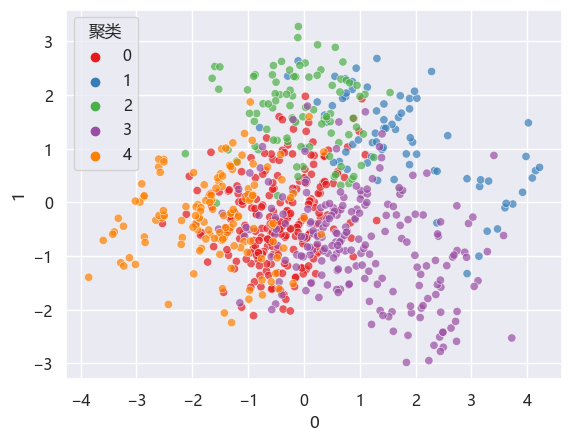

In [29]:
# 使用StandardScaler进行自动标准化
std = StandardScaler()
pca_cus = std.fit_transform(cus)
# 定义主成分分析函数，n_components为目标维度
pca = PCA(n_components=3, random_state=42)
# 进行降维
test = pca.fit_transform(pca_cus)
# explained_variance_ratio_能查询降维后的数据集能够解释原数据集多少的变化度
print(sum(pca.explained_variance_ratio_))
# PCA输出的结果是numpy数组，需转化为dataframe方便后续画图操作
test = pd.DataFrame(test)
# 将聚类信息以字符串的形式加入表格，使程序将其处理为类别变量
test['聚类'] = labels.astype(str)
# 由于数据集过大，随机抽取750个点进行画图
test = test.sample(750, random_state=42)
test.sort_values(by='聚类', inplace=True)
# 选择第一和第二主成分画二维散点图
sns.scatterplot(data = test, x=0, y=1, hue='聚类', alpha=.7, palette='Set1')

三维分解后的数据集能够解释原数据集50%的变化度，并不是很出色，从上图我们也可以从聚类结果看出降维效果不尽人意，这是由于先前解释的细节丢失。但在二维空间中我们已经能够看出每一个类别都有一个大致的范围，这表明聚类结果已经可以将相似数据聚类，只不过在二维空间下并不能完美展现。

In [30]:
# 使用plotly绘制三维空间散点图
fig = px.scatter_3d(test, x=0, y=1, z=2, color='聚类')
fig.update_traces(marker={'size': 4})
fig.update_layout(autosize=False, height=800, width=800)
fig.show()

在三维空间下我们已经能看出一些类别间有明显的区分，但还是由于变化解释度较低，不能看出每个类别间有明显区分

接下来我们将运用K近邻算法进行新用户推荐。K近邻是监督学习算法，他会选出新输入的数据点周边最近的K个点（K通常为奇数），通过投票的方式预测新输入点的类别。故我们需要训练集的类别信息进行结果预测，但数据集本身并没有提供因类别信息。此处我们可以将前面K均值的聚类结果视为类别信息将其输入至K近邻，训练完成后进行新客户类别的预测。</br>需特别注意由于新客户的开户时长、客户等级、客户状态均为固定值，会导致预测结果大幅塌缩至某几个固定类别，所以我们在训练K近邻模型时续将老客户中的这三个变量去除。

In [41]:
# 读取新客户信息表格，并进行与老客户相同的数据变换
df1 = pd.read_csv('新客户信息.csv')
df1['年收入log'] = np.log(df1['年收入'])
# 定义新的序号编码器
new_encoder = ce.OrdinalEncoder(cols=['雇员关系',
                                      '性别',
                                      '年龄层级',
                                      '是否外国人',
                                      '省份名称'], return_df=True)

使用老客户信息进行K均值聚合得到类别信息。此处为方便演示将客户分为10类。

In [42]:
# 选出老客户中需要的变量
old_cus = df[['雇员关系',
              '性别',
              '年龄层级',
              '是否外国人',
              '省份名称',
              '年收入log']]
old_cus = new_encoder.fit_transform(old_cus)
n = 10
old_km = KMeans(n_clusters=n, random_state=42)
old_km.fit(cus)
old_labels = old_km.labels_

In [33]:
# 与前面相似，得到推荐优先级表
df['聚类'] = old_labels
old_pref = df.groupby('聚类').agg({'金融衍生品': sum,
                                   '高级个人账户': sum,
                                   '尊享个人账户': sum,
                                   '短期存款': sum,
                                   '中期存款': sum,
                                   '长期存款': sum,
                                   '基金': sum,
                                   '抵押贷款': sum,
                                   '养老金': sum,
                                   '小额贷款': sum,
                                   '信用卡': sum,
                                   '证券': sum})
new_recom = []
for i in range(n):
    pro = old_pref.iloc[i, :]\
        .sort_values(ascending=False)\
        .to_frame(name='计数')\
        .reset_index(names=['产品'])
    pro = pro[pro['计数'] > 0]
    new_recom.append(pro['产品'].to_list())

In [34]:
# 定义K近邻分类器，n_neighbors为参考近邻点数量
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(old_cus, old_labels);

与前面类似，以下我们会自定义一个针对新客户的产品推荐函数。

In [54]:
# 函数输入为客户的ID
def new_recommand(id: int):
    # 获取目标客户需要的变量
    new_customer = df1[df1['客户ID'] == id][['雇员关系',
                                             '性别',
                                             '年龄层级',
                                             '是否外国人',
                                             '省份名称',
                                             '年收入log']]
    # 序号编码
    new_cus = new_encoder.transform(new_customer)
    # 预测类别
    new_label = knn.predict(new_cus)
    # 返回推荐结果
    return new_recom[new_label[0]][0:3]
# 查看随机客户的推荐结果
new_recommand(df1.sample()['客户ID'].values[0])

['信用卡', '长期存款', '高级个人账户']